In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
train = pd.read_csv('../data/input/train.csv')
train.rename(columns={'index': 'id'}, inplace=True)
test = pd.read_csv('../data/input/test.csv')
data = pd.concat([train, test], sort=False)
sample_submit = pd.read_csv('../data/input/sample_submit.csv', names=['id', 'Y'])


In [3]:
train

id  age  workclass  fnlwgt     education  education-num  \
0          0   22    Private  132618  Some-college             12   
1          1   22    Private  132655     Bachelors              9   
2          2   23          ?  132674       HS-grad              8   
3          3   36    Private  132642     Bachelors             13   
4          4   49    Private  132646     Assoc-voc             13   
...      ...  ...        ...     ...           ...            ...   
10195  10195   31    Private  132650     Bachelors              9   
10196  10196   36    Private  132590       HS-grad              9   
10197  10197   36  Local-gov  132498     Bachelors             13   
10198  10198   17    Private  132614  Some-college              9   
10199  10199   36          ?  132691     Assoc-voc              4   

           marital-status       occupation    relationship   race     sex  \
0           Never-married     Tech-support       Own-child  White  Female   
1      Married-civ-spouse  Farming-fishing         Husband  White    Male   
2           Never-married    Other-service   Not-in-family  White  Female   
3      Married-civ-spouse            Sales         Husband  White    Male   
4      Married-civ-spouse  Exec-managerial         Husband  White    Male   
...                   ...              ...             ...    ...     ...   
10195            Divorced     Craft-repair  Other-relative  White  Female   
10196  Married-civ-spouse  Exec-managerial       Unmarried  White    Male   
10197  Married-civ-spouse                ?         Husband  Black    Male   
10198       Never-married                ?   Not-in-family  White  Female   
10199            Divorced   Prof-specialty         Husband  Black    Male   

      native-country  Y  
0      United-States  0  
1             Mexico  1  
2      United-States  0  
3      United-States  1  
4      United-States  1  
...              ... ..  
10195         Mexico  0  
10196         Mexico  0  
10197  United-States  0  
10198  United-States  0  
10199  United-States  0  

[10200 rows x 13 columns]

In [4]:
test

id  age workclass  fnlwgt     education  education-num  \
0     10200   30   Private  132646       HS-grad             12   
1     10201   30   Private  132626       HS-grad              4   
2     10202   36   Private  132505     Bachelors              8   
3     10203   23   Private  132610       HS-grad              9   
4     10204   36   Private  132468          12th              9   
...     ...  ...       ...     ...           ...            ...   
6795  16995   31   Private  132530  Some-college              9   
6796  16996   31   Private  132634     Bachelors              6   
6797  16997   31   Private  132598       HS-grad             13   
6798  16998   23   Private  132573  Some-college              8   
6799  16999   23         ?  132633       5th-6th              9   

          marital-status         occupation   relationship  \
0               Divorced     Prof-specialty      Unmarried   
1          Never-married              Sales           Wife   
2     Married-civ-spouse     Prof-specialty        Husband   
3               Divorced                  ?  Not-in-family   
4     Married-civ-spouse              Sales        Husband   
...                  ...                ...            ...   
6795            Divorced  Handlers-cleaners  Not-in-family   
6796       Never-married   Transport-moving  Not-in-family   
6797             Widowed    Farming-fishing  Not-in-family   
6798            Divorced                  ?  Not-in-family   
6799       Never-married      Other-service      Own-child   

                    race     sex native-country  
0                  White    Male         Mexico  
1                  White  Female  United-States  
2                  White    Male         Mexico  
3                  White  Female  United-States  
4                  White    Male  United-States  
...                  ...     ...            ...  
6795               White  Female  United-States  
6796  Asian-Pac-Islander    Male  United-States  
6797               White    Male  United-States  
6798               Black  Female  United-States  
6799               White  Female  United-States  

[6800 rows x 12 columns]

In [5]:
sample_submit

id  Y
0     10200  0
1     10201  0
2     10202  0
3     10203  0
4     10204  0
...     ... ..
6795  16995  0
6796  16996  0
6797  16997  0
6798  16998  0
6799  16999  0

[6800 rows x 2 columns]

In [6]:
data

id  age workclass  fnlwgt     education  education-num  \
0         0   22   Private  132618  Some-college             12   
1         1   22   Private  132655     Bachelors              9   
2         2   23         ?  132674       HS-grad              8   
3         3   36   Private  132642     Bachelors             13   
4         4   49   Private  132646     Assoc-voc             13   
...     ...  ...       ...     ...           ...            ...   
6795  16995   31   Private  132530  Some-college              9   
6796  16996   31   Private  132634     Bachelors              6   
6797  16997   31   Private  132598       HS-grad             13   
6798  16998   23   Private  132573  Some-college              8   
6799  16999   23         ?  132633       5th-6th              9   

          marital-status         occupation   relationship  \
0          Never-married       Tech-support      Own-child   
1     Married-civ-spouse    Farming-fishing        Husband   
2          Never-married      Other-service  Not-in-family   
3     Married-civ-spouse              Sales        Husband   
4     Married-civ-spouse    Exec-managerial        Husband   
...                  ...                ...            ...   
6795            Divorced  Handlers-cleaners  Not-in-family   
6796       Never-married   Transport-moving  Not-in-family   
6797             Widowed    Farming-fishing  Not-in-family   
6798            Divorced                  ?  Not-in-family   
6799       Never-married      Other-service      Own-child   

                    race     sex native-country    Y  
0                  White  Female  United-States  0.0  
1                  White    Male         Mexico  1.0  
2                  White  Female  United-States  0.0  
3                  White    Male  United-States  1.0  
4                  White    Male  United-States  1.0  
...                  ...     ...            ...  ...  
6795               White  Female  United-States  NaN  
6796  Asian-Pac-Islander    Male  United-States  NaN  
6797               White    Male  United-States  NaN  
6798               Black  Female  United-States  NaN  
6799               White  Female  United-States  NaN  

[17000 rows x 13 columns]

In [7]:
pdp.ProfileReport(train)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


In [8]:
pdp.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


<Figure size 1440x1440 with 0 Axes>

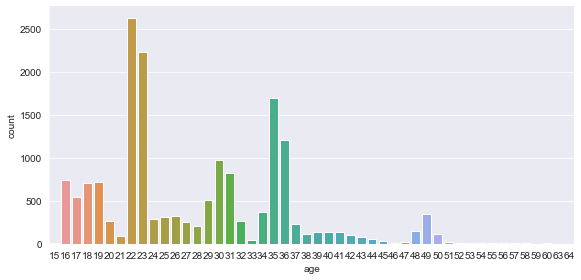

In [9]:
# 年齢の分布が明らかに不自然．ビニングすることによって対処できないか？
plt.figure(figsize=(20, 20))
sns.catplot(x='age', data=data, kind='count', height=4, aspect=2)

<Figure size 432x288 with 0 Axes>

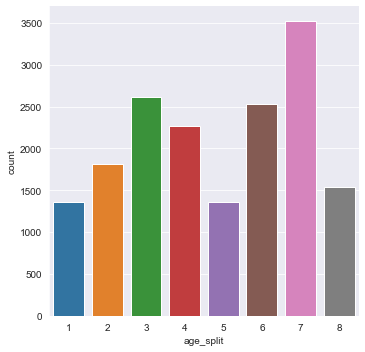

In [10]:
# 年齢の分布が明らかに不自然．ビニングすることによって対処できないか？
plt.figure(figsize=(6,4))
# アメリカでは18歳未満が未成年なので，18での区切りは入れておく．
bins = [-1, 17, 21, 22, 23,28,33,37,100]
data['age_split']=pd.cut(train['age'], bins=bins, labels=[i for i in range(1, len(bins))])
sns.catplot(x='age_split', data=data, kind='count')